# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import pickle
import progress_bar
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import numpy as np
import cv2
from scipy import ndimage
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf
import os
import csv
from operator import itemgetter

In [2]:
training_file = 'traffic-signs-data/train.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

ImportError: No module named 'keras'

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [ ]:
# Replace each question mark with the appropriate value.
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
def sample_images(data, cmap):
    chart_width = 15
    chart_height = 2
    plt.rcParams["figure.figsize"] = [chart_width, chart_height]
    
    for i in range(5):
        plt.subplot(1,5,i+1)
        plt.imshow(data[i], cmap=cmap)
    plt.show()

def view_class_distribution(y_set, set_type, color):
    plt.hist(y_set, bins=n_classes, color=color)
    plt.title('Number of Features Per Traffic Sign in the ' + set_type + ' Set')
    plt.xlabel('Traffic Sign Class')
    plt.ylabel('Count of Features')
    plt.plot()
    plt.show()

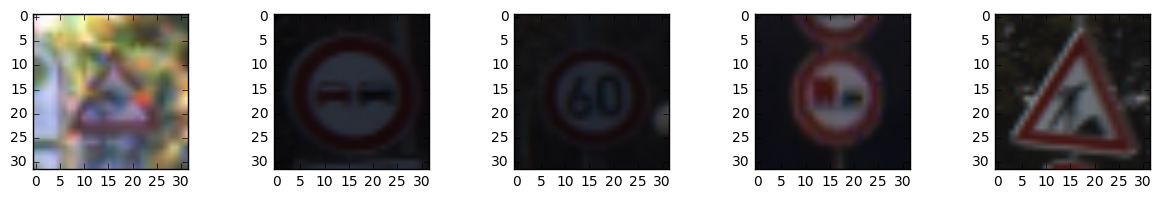

NameError: name 'n_classes' is not defined

In [4]:
random_sample = X_train[np.random.choice(X_train.shape[0], 5, replace=False), :]
sample_images(random_sample, 'jet')
view_class_distribution(y_train, 'Original Training', 'red')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [5]:
def preprocess(X_set):
    X_set = grayscale(X_set)
    X_set = normalize(X_set)
    return X_set

In [6]:
def grayscale(image_set):
    gray_images = []
    for image in image_set:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        gray_images.append(gray)
        
    return np.array(gray_images)

In [7]:
def normalize(image_set):
    return image_set / 255 * 0.8 + 0.1

In [8]:
X_train = preprocess(X_train)
X_train = X_train[..., np.newaxis]
X_test = preprocess(X_test)
X_test = X_test[..., np.newaxis]
random_sample = X_train[np.random.choice(X_train.shape[0], 5, replace=False), :]

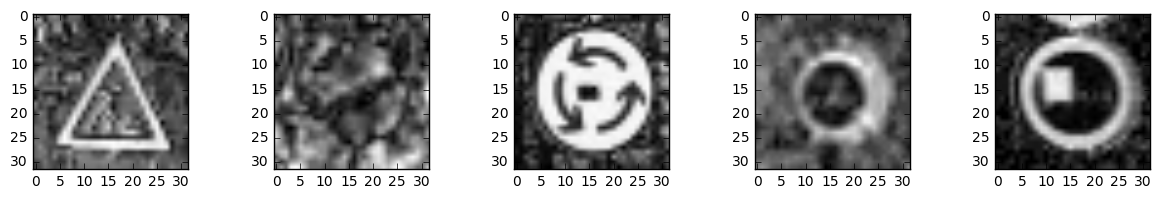

In [10]:
sample_images(random_sample.squeeze(), 'gray')

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**In order preprocess the images, I used two simple steps. (1) I converted all of the images to grayscale, and (2) I normalized the image to have values between 0.1 and .9, instead of 0 to 255.**

**When I first considered grayscaling, I was against the idea as it essentially discarded two-thirds of the data. My intuition was that the more data, the better. But in looking over the traffic signs, I found that similar patterned signs also used the same colors, and each sign was distinguished more by the shapes and patterns of the sign than the color. By including grayscaling in my preprocessing, I saw negligible loss in my validation accuracies but huge efficiency gains. Thus I decided to stick with using grayscaling in my preprocessing.**

**I also used normalization in the preprocessing for two reasons. The first reason is whenever you have multiple data sources, it is a good idea to scale the data with normalization. In this project, I would need to use the provided pickle files with the training and testing sets having RGB values between 0 and 255. However, when I pulled my own images in using Matplotlib's imread function, the images came in with pixel values between 0 and 1. By using normalization, I was able to bring pixel values to a common scale. The second reason is something that I learned in our Tensorflow lectures. Essentially, when values become too large or small, operations that you perform with these values can become unstable, and produce unexpected results. By normalizing the data, I avoid this risk by keeping values at very stable levels. **

**I have printed a random selection of 5 images that have been preprocessed. Note the difference from the random 5 images in the data exploration section above.**

In [ ]:
def balance_classes(X_train, y_train):
    counts = np.bincount(y_train)
    top_feature_count = counts[np.argmax(counts)]

    training_features = np.empty([1,32,32,1])
    training_labels = np.empty([1])
    
    for i in progress_bar.log_progress(range(len(counts)), every=1):
        class_images = np.array([img_data[1] for img_data in zip(y_train, X_train) if img_data[0] == i])
        
        while class_images.shape[0] < top_feature_count:
            new_images = new_image_batch(class_images[:counts[i] - 1])
            class_images = np.append(class_images, new_images, axis=0)
            
        class_images = class_images[:top_feature_count]
        class_labels = np.ones(class_images.shape[0]) * i

        training_features = np.append(training_features, class_images, axis=0)
        training_labels = np.append(training_labels, class_labels, axis = 0)
    return training_labels, training_features

def new_image_batch(original_batch):
    rotation_angle = random.randint(-25,25)
    batch = ndimage.rotate(original_batch, rotation_angle, axes=(1,2), reshape=False, output=None, order=3, mode='constant', cval=0.0, prefilter=True)
    return batch
    

In [ ]:
y_train, X_train = balance_classes(X_train, y_train)

In [ ]:
view_class_distribution(y_train, 'Balanced Training', 'green')

In [ ]:
X_train, y_train = shuffle(X_train, y_train)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=21)

In [ ]:
view_class_distribution(y_train, 'Split Training', 'green')
view_class_distribution(y_validation, 'Split Validation', 'blue')

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**As seen in the data exploration section of this notebook, I have charted a histogram of the amount of features (images) for any given traffic sign. There is a huge variance in the amount of data per traffic sign, which would introduce biases in our model. To more clearly explain this, if I had 5 pictures of a "Stop" sign and 1 picture of a "Yield" sign, the model could guess that all of the images are "Stop" signs and have a 83% accuracy, whereas a guess of that all are "Yield" signs would poor 17% accuracy. This essentially rewards a model for being biased towards labels that have the most features.**

**In order to reconcile this issue, I balance out the label classes by generating additional data. I do this by iterating through each class and comparing its image count to the maximum image count of classes. If there is less images in the current class, then I append a new batch of images, based on the original batch, that I rotate by a random-integered angle between -20 and 20 degrees. By giving a rotation to the images, it allows the model to treat these as unique images to learn from. In addition to rotation, I also tried randomly sliding the pixels and changing the brightness, but I found that efficiency costs of these additional steps were too high.**

**You will notice three new histograms charted above. The first shows the balanced data set. I then shuffle this dataset so that I can split the data into training and validation sets without the worry of patterns affecting the training and validation. I then split the randomized data, which I charted into split training and split validation histograms.**

In [ ]:
EPOCHS = 15
BATCH_SIZE = 350

In [ ]:
def ConvNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.08
    
    conv1_W = tf.Variable(tf.truncated_normal([5, 5, 1, 6]))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.avg_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    conv2_W = tf.Variable(tf.truncated_normal([5, 5, 6, 16]))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.avg_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    fc0   = tf.contrib.layers.flatten(conv2)

    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 200), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(200))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    fc1    = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, dropout)

    fc2_W  = tf.Variable(tf.truncated_normal(shape=(200, 100), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(100))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    fc2    = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, dropout)

    fc3_W  = tf.Variable(tf.truncated_normal(shape=(100, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [ ]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
dropout = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

In [ ]:
logits = ConvNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = 0.006)
training_operation = optimizer.minimize(loss_operation)

In [ ]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, dropout: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**I borrowed heavily from the LeNet lab solution that was given to me in a previous assignment. Not only because it was recommended for this project, but because the initial results were very good. **

**This architecture includes two convolutional layers and three fully connected layers. In working on this, I tried to add seperately an additional convolutional layer and a fully connected layer, but neither positively effected the validation accuracy of the model. I used Relu activation for every one of the layers as had been done in the LeNet lab. However, unlike the LeNet lab, I changed the pooling from max pooling to average pooling. I did this because I felt that by averaging we are able to create the same efficiency gains max pooling, but without the data loss of max pooling. Also, unlike the LeNet lab, I used dropout of .7 to create redundant models on a limited set of the nodes, which allows us to rely on the aggregate model of all nodes for new data. Another difference from the LeNet architecture was the number of out put classes. The LeNet lab used the MNIST data set which required only 10 output classes, whereas the traffic sign dataset requires 43. In order to adjust for this, I adjusted the output between the fully connected layers to a more gradual decrease in output size. Instead of 400 -> 120 -> 84 -> 10, my architecture's fully connected layer outputs are 400 -> 200 -> 100 -> 43. **

In [ ]:
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, dropout: 0.7})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess, 'trained_model')
    print("Model saved")

In [ ]:
# Launch the model on the test data
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./'))
    test_accuracy = sess.run(accuracy_operation, feed_dict={x: X_test, y: y_test, dropout: 1.0})

print('Test Accuracy: {}'.format(test_accuracy))

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Again, my training of the model was borrowed heavily from the LeNet lab. Although I expiremented with the Gradient Descent Optimize, I found that AdamOptimizer included in Tensorflow worked best. I found that by increasing my batch size, I had significant gains in accuracy, but those gains seemed to plataeu around a batch size of 350. Although I started with 10 Epochs, sometimes the model would take a bit longer to climb to its maximum validation accuracy. I increased to 15 Epochs to allow for instances where the model learns more slowly. However in instances where the model learns quickly, the extra 5 Epochs can seem redundent. I decided to prioritize reliable accuracy over efficiency in this case. **

**With the hyperparamets, I kept a mean of zero, but lowered the sigma value a bit. I was concerned about my model arriving at a local optimum, and by initializing the weights with a lower sigma, it starts the model off by treating all the features a bit more equally and gives it more room to adjust with backpropogation. Although I didn't see much of an effect on the validation accuracy from the change of sigma, I felt my decision to decrease the sigma from .1 to .08 was reasoned and reasonable.**

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**This was mainly a process of trial and error. The first thing I changed was the learning rate, which was set at 0.01. I thought this was on the high-end for a value to begin with, so I decreased to 0.001 to prevent overshooting and noticed that by the 10th Epoch, validation accuracy was only achieving half of what it did with the original learning rate. I eventually ended up at 0.06 as a more moderate rate that performed equally well to the 0.01 initial value. I knew that I wanted to implement dropout to prevent against overfitting, and when I set my dropout value to .5 I found that my validation accuracies dropped from the 95% provided by the LeNet lab to an 88%. I adjusted the training dropout to .7 and found that my values came back up to a reasonable 94%.** 

**I found that by trying to implement an additional layer to the LeNet architecture, although it was really good for the sake of my learning, it actually decreased accuracies into the lower 90's and upper 80's. I decided that instead of overhauling the architecture, I would tweek the pooling function from max to average. This gave me a boost of around 3% in accuracy. By I tried increasing and decreasing the batch size and found that increasing from the LeNet lab's value, increased the accuracy an addition 1% or so. I also found that, at times, 10 Epochs seemed to be cutting off the model while it was still learning and improving accuracy, albeit through small improvements. I increased to 15 Epochs which allowed it to consistently hit the maximum I am able to achieve: around 98%+.**

**I would call this method a educated trial and error, since there were parameters that I knew would make a difference, such as learning_rate, dropout, average pooling. However, it was still very manual and I could not find that optimum combination of all these variables. I am guessing there are much more efficient and effective methods such as a grid search of optimal variable combinations. **

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
local_images = os.listdir("test_images/")
local_images = local_images[1:]

# Show the images, add to a list to process for classifying
local_images_data = []
for i in local_images:
    i = 'test_images/' + i
    image = mpimg.imread(i)
    image = cv2.resize(image,dsize=(32,32))
    local_images_data.append(image)
local_images_data = np.array(local_images_data)

In [ ]:
sample_images(local_images_data, 'jet')

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



In the Self Driving Car Nanodegree facebook page, a fellow student Hanqiu Ying, who lives in germany, shared a folder of images that we could use for this project. I only kept the five most difficult images of that set of images. In the first image, the background is complex. The second image is tilted a bit and is a bit darker. The third image has a tree branch with a few leaves that is in front of it. The fourth has a sticker on the sign. The fifth is taken from a very sharp angle.

The images are plotted above in the order described.

In [ ]:
gray_images_data = grayscale(local_images_data)
gray_images_data = gray_images_data * .8 + .1
gray_images_data = gray_images_data[..., np.newaxis]

In [ ]:
sample_images(gray_images_data.squeeze(), 'gray')

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./'))
    local_image_classes = sess.run(logits, feed_dict={x: gray_images_data, dropout : 1.0})

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Below, I have printed out the picture and a chart below each picture that identifies the softmax probability distribution for the top 5 traffic signs it within my model's prediction. We can see from this that it correctly identified 4/5 (80%) of the images to the corresponding road signs.**

In [ ]:
with open('signnames.csv', 'r') as f:
  reader = csv.reader(f)
  label_list = list(reader)
    
label_list = label_list[1:]
k = 5

with tf.Session() as sess:
    predictions = sess.run(tf.nn.top_k(local_image_classes, k=k, sorted=True))
    
prediction_values = predictions[0]
prediction_classes = predictions[1]

for i in range(k):
    plt.figure(figsize=(1,1))
    plt.imshow(local_images_data[i])
    plt.show()
    
    plt.figure(i)
    
    x_tick_locations = np.arange(k)
    bar_width = 0.30 
    chart_width = 15
    chart_height = 2
    plt.rcParams["figure.figsize"] = [chart_width, chart_height]
    
    values = predictions[0][i]
    plt.bar(x_tick_locations, values)
    
    plt.ylabel('Prediction Probabilities')
    plt.xlabel('Sign Class Labels')
    plt.title('Prediction Probabilities for Test Image ' + str(i+1))
    
    predicted_class_csv_info = itemgetter(*prediction_classes[i])(label_list)
    traffic_sign_names = [data[1] for data in predicted_class_csv_info]
    plt.xticks(x_tick_locations + bar_width, traffic_sign_names, rotation=10)
    plt.show()

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

**I am pretty proud of my model's predictions! The first 4 images, my model was relatively certain of its predictions. In the bar charts above, for each image you can see the probability for each prediction, with the strongest on the right. The first image's top prediction tripled the next highest prediction probability. The second image's top prediction quadrupled to next highest prediction probability. The third and fourth images were not nearly as certain, but still has nearly double to prediction probability of the next strongest predictions. All four of these were relatively certain their prediction, and were correct in their certainty. The fifth image was incorrect, but the certainty is much closer, with the correct prediction coming in a close second. By looking at the actual image, it is understandable why this sign was misidentified, as the angle of the image make it particularly difficult to recognize, even for humans. For this reason I am surprised that the correct prediction was in the top 5, let alone in a close second!**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.